# Test xarray_leaflet

Doesn't show anything. To be reviewed: Check lib versions.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import xarray_leaflet
import ipyleaflet
import rioxarray

[[1000. 1000. 1000. ... 1500. 1500. 1500.]
 [1000. 1000. 1000. ...    0.    0. 1500.]
 [1000. 1000. 1000. ...    0.    0. 1500.]
 ...
 [1500.    0.    0. ...    0.    0. 1500.]
 [1500.    0.    0. ...    0.    0. 1500.]
 [1500. 1500. 1500. ... 1500. 1500. 1500.]]


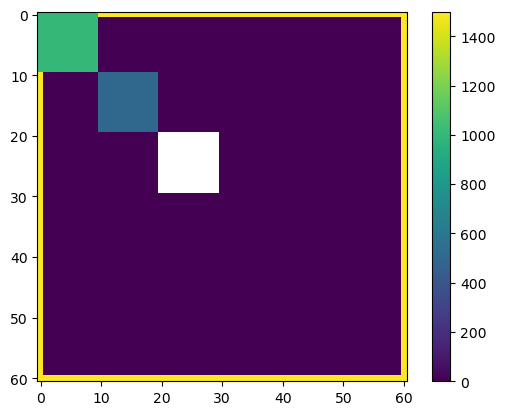

In [12]:
z=1500

image = np.zeros((61, 61))
image[0, :] = z
image[60, :] = z
image[:, 0] = z
image[:, 60] = z
image[:10,:10] = 1000
image[10:20,10:20] = 500
image[20:30,20:30] = np.nan

print(image)

plt.imshow(image)
plt.colorbar()

In [13]:
da = xr.DataArray(image, dims=['y','x'], coords=dict(x=np.arange(-60,61,2), y=np.arange(61,0,-1)))
da

<xarray.DataArray (y: 61, x: 61)> Size: 30kB
array([[1000., 1000., 1000., ..., 1500., 1500., 1500.],
       [1000., 1000., 1000., ...,    0.,    0., 1500.],
       [1000., 1000., 1000., ...,    0.,    0., 1500.],
       ...,
       [1500.,    0.,    0., ...,    0.,    0., 1500.],
       [1500.,    0.,    0., ...,    0.,    0., 1500.],
       [1500., 1500., 1500., ..., 1500., 1500., 1500.]], shape=(61, 61))
Coordinates:
  * x        (x) int64 488B -60 -58 -56 -54 -52 -50 -48 ... 48 50 52 54 56 58 60
  * y        (y) int64 488B 61 60 59 58 57 56 55 54 53 52 ... 9 8 7 6 5 4 3 2 1

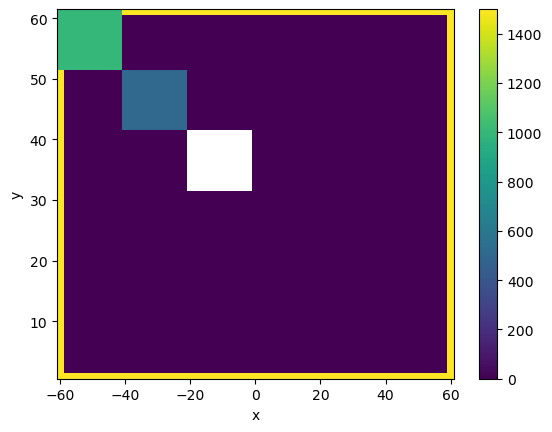

In [14]:
da.plot()

In [15]:
m = ipyleaflet.Map(center=[0, 0], zoom=3)
da = da.rio.write_crs(4326)  # WGS 84
da = da.rio.write_nodata(np.nan)
l = da.leaflet.plot(m)
m

Url()

Map(center=[0, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text'…